In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
phe_directory = "/share/PI/mrivas/data/ukbb/phefiles/highconfidenceqc/"

def choose_phes(phe_directory, freq):
 
    name_to_id = {}
    name_to_id_file = open(phe_directory + "highconfidenceqc_map.txt", "r")
    for line in name_to_id_file.readlines():
        line = line.split(" ", 1)
        name_to_id[line[1][:-1]] = line[0]
    name_to_id_file.close()

    freq_to_id = {}

    freq_to_id_file = open(phe_directory + "17_07_04_highconfidence_summary.csv", "r")
    info = freq_to_id_file.readlines()
    info = info[1:]
    for line in info:
        line = line.split(",")
        try:
            freq_to_id[int(line[1][:-1])] = name_to_id[line[0]]
        except:
            print(line[1][:-1])
            print(line[0])

    freq_to_id_file.close()
    keylist = list(freq_to_id.keys())
    #print(freq_to_id)
    keylist.sort()
    ids = []
    #print(keylist)
    for key in keylist:
        if key > freq:
            ids.append(freq_to_id[key])
    return ids

In [3]:
phes=choose_phes(phe_directory, 500)
for i in range(len(phes)):
    phes[i] = "HC" + phes[i]
#print(x)

606
myasthenia gravis.1


In [4]:
df = pd.read_csv("../phe_hap_table_post.txt", header=0, index_col=0)
#df

In [39]:
df=df.loc[phes]

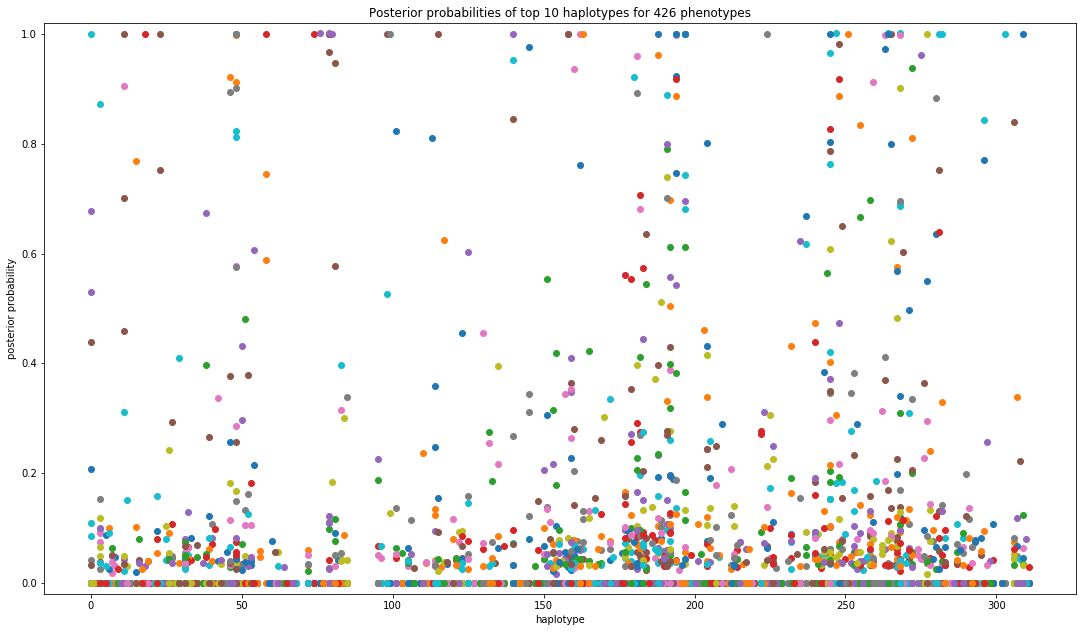

In [4]:
x_pos = np.arange(df.shape[1])
for i in range(df.shape[0]):
#for i in range(8,9):
    plt.plot(x_pos, df.iloc[i], marker="o", linestyle="")
    #print(df.iloc[i].dropna())
#plt.xticks(x_pos, list(df.columns.values), rotation="vertical", fontsize=5)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylim([-0.02,1.02])
plt.xlabel("haplotype")
plt.ylabel("posterior probability")
plt.title("Posterior probabilities of top 10 haplotypes for " + str(df.shape[0]) + " phenotypes")
plt.savefig("../plots/post_hap_plot.png")
plt.show()

In [5]:
def hap_plot(df):
    gene = list(df)[0].split("_")[0]
    x_pos = np.arange(df.shape[1])
    for i in range(df.shape[0]):
    #for i in range(8,9):
        plt.plot(x_pos, df.iloc[i], marker="o", linestyle="")
        #print(df.iloc[i].dropna())
    plt.xticks(x_pos, list(df.columns.values), rotation="vertical", fontsize=10)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.ylim([-0.02,1.02])
    plt.xlabel("haplotype")
    plt.ylabel("posterior probability")
    plt.title("Posterior probabilities of top 10 haplotypes for " + str(df.shape[0]) + " phenotypes (HLA-" + gene + ")")
    plt.savefig("../plots/post_hap/post_hap_plot_" + gene + ".png")
    plt.show()

In [7]:
l = list(df)
for i in range(len(l)):
    l[i] = l[i].split("_")[0]
genes = list(set(l))
print("genes: {}".format(genes))

genes: ['A', 'C', 'B', 'DQB1', 'DPB1', 'DPA1', 'DQA1', 'DRB4', 'DRB5', 'DRB1', 'DRB3']


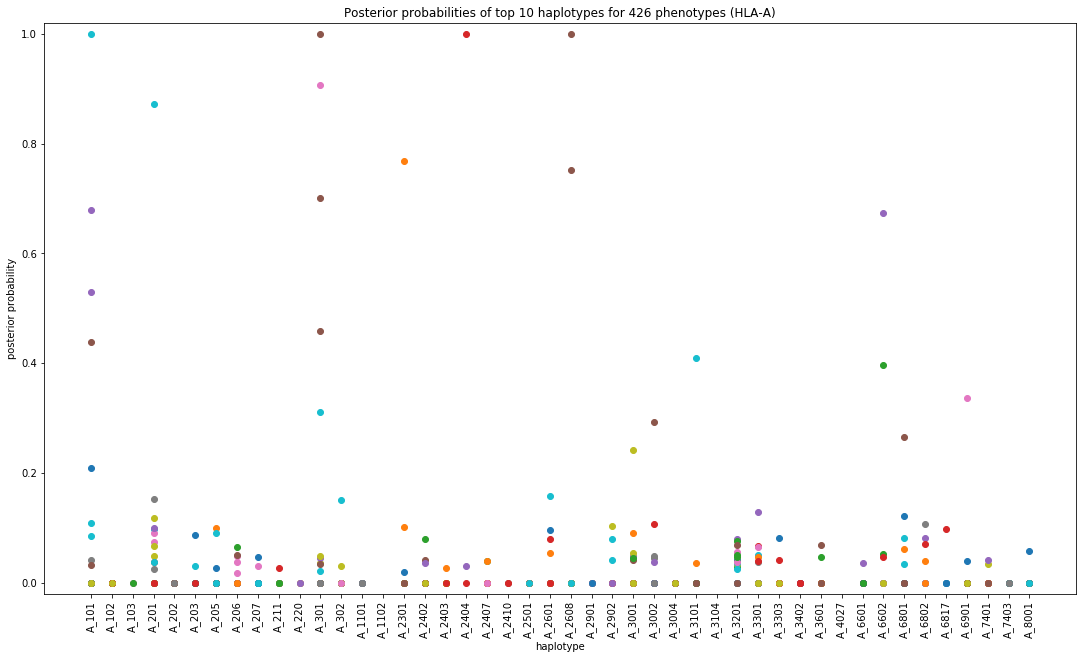

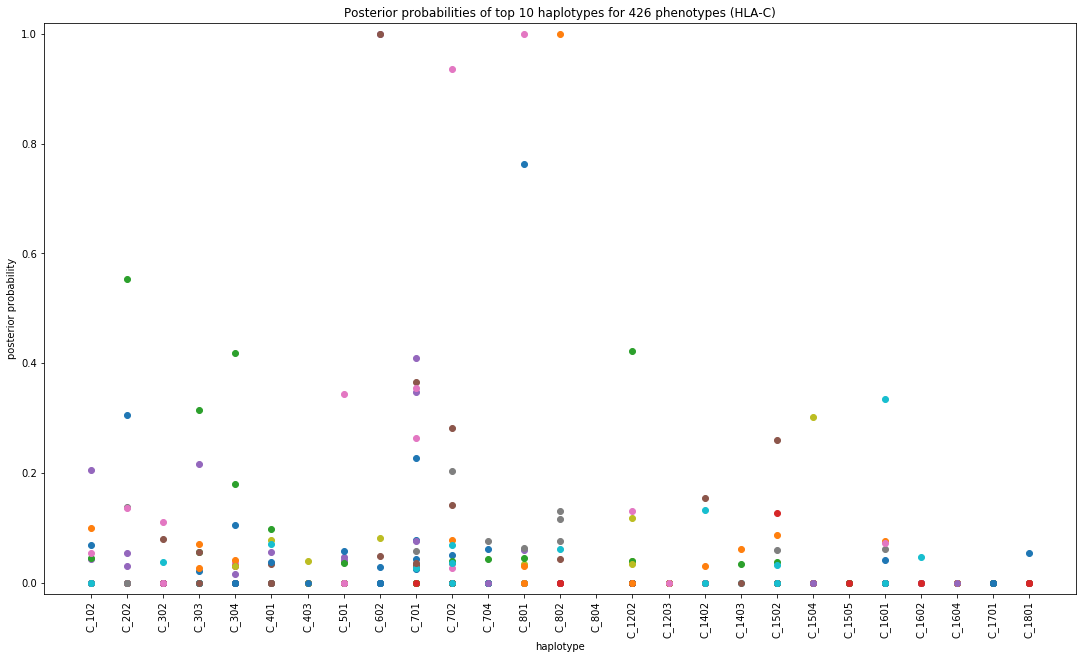

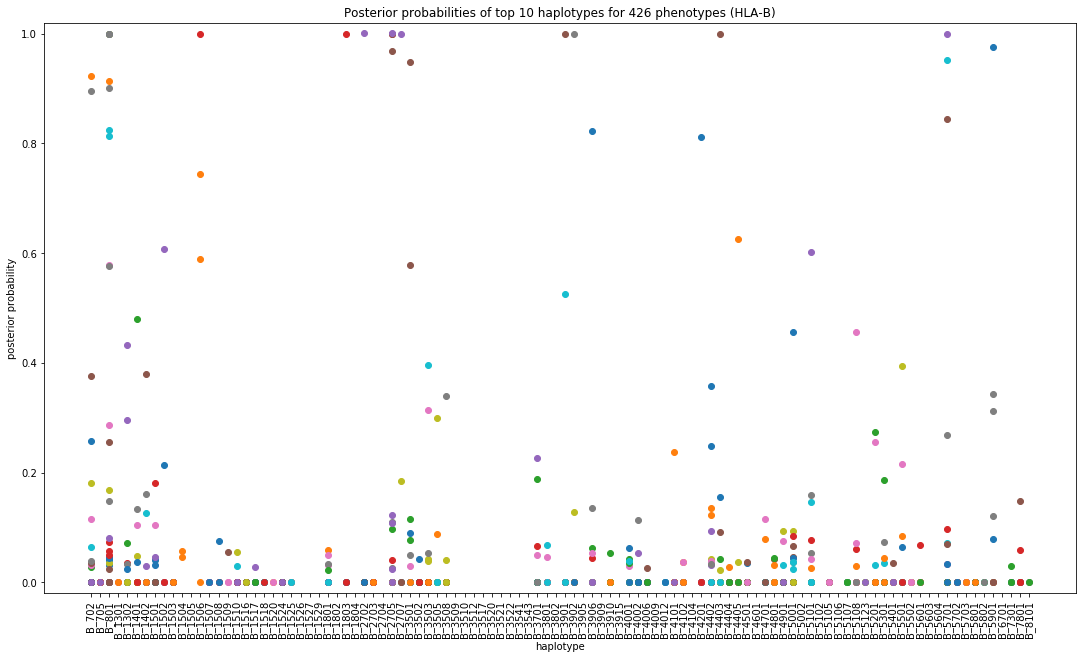

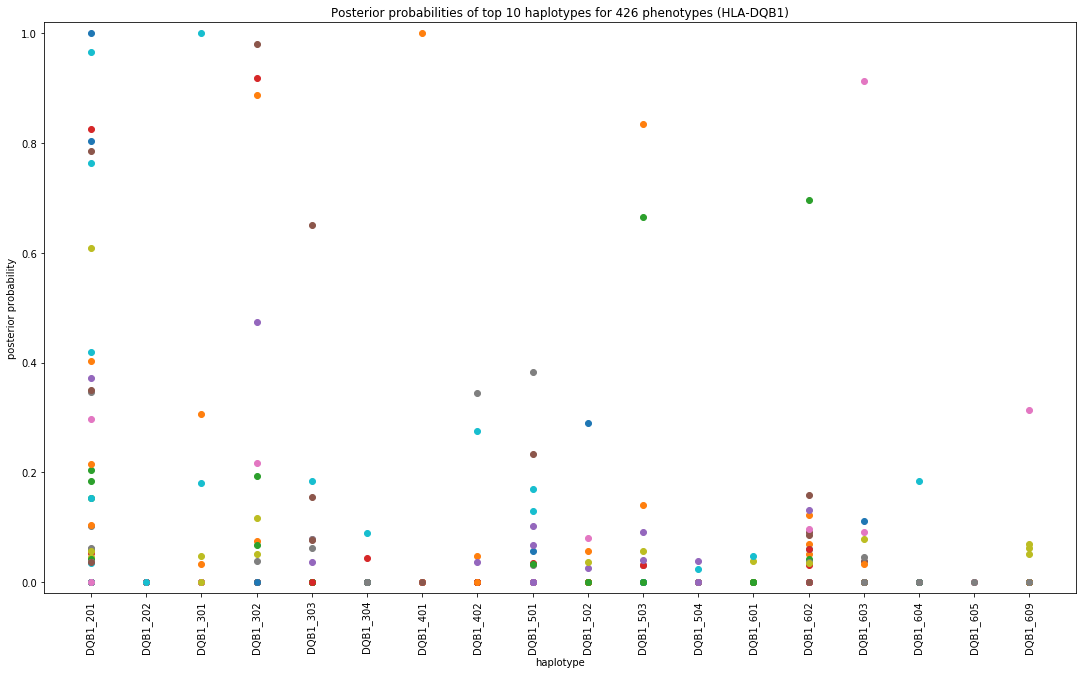

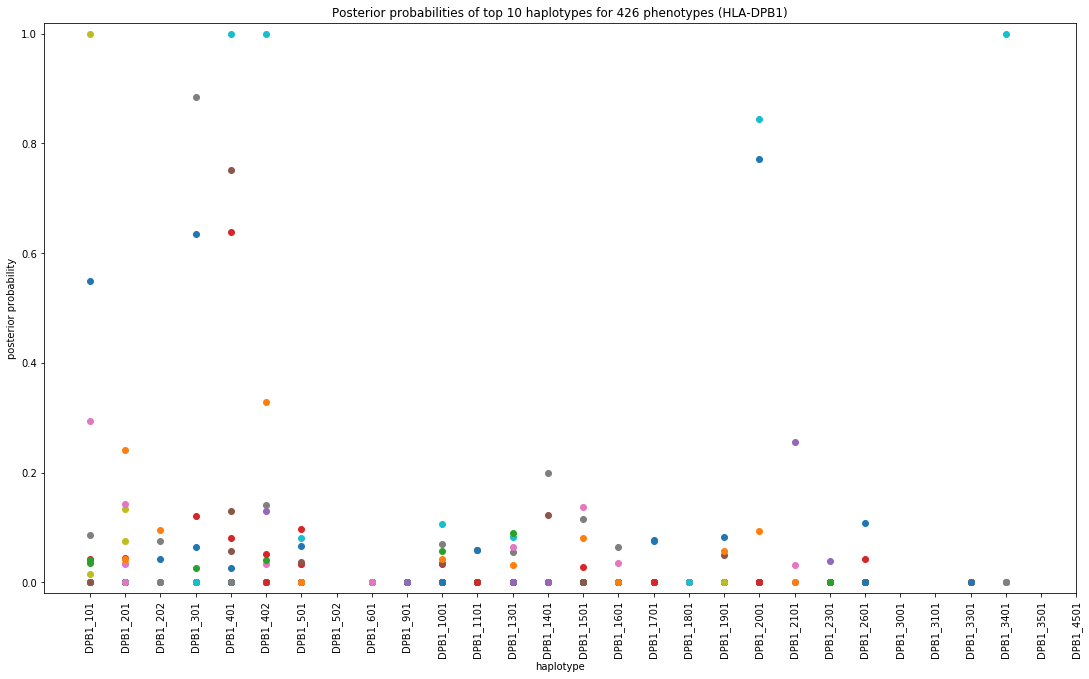

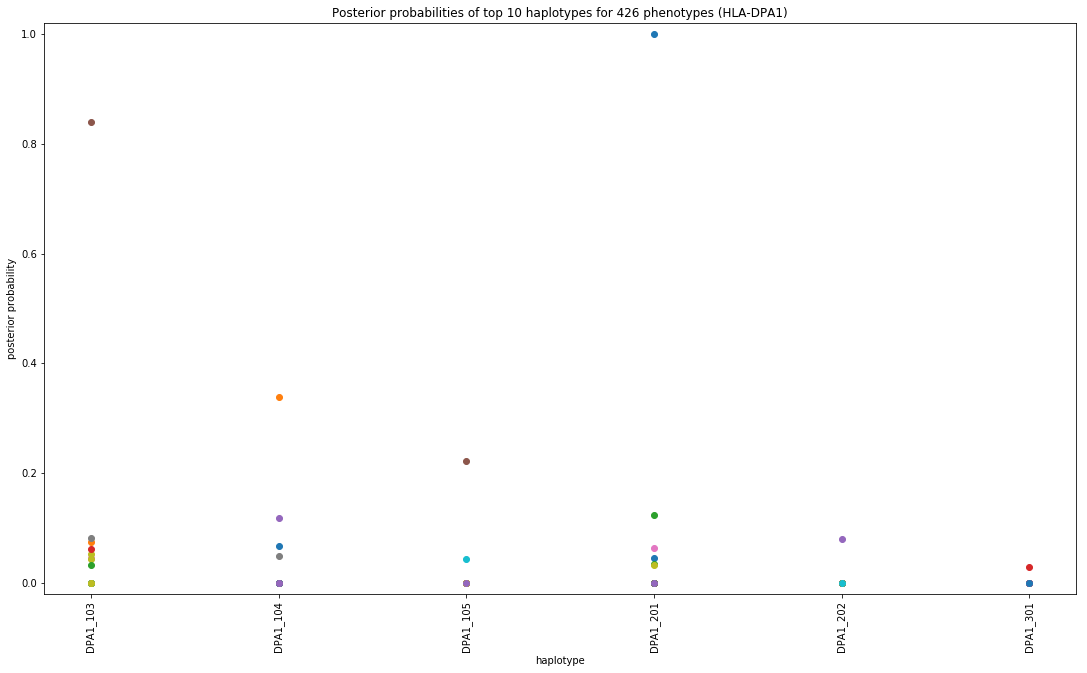

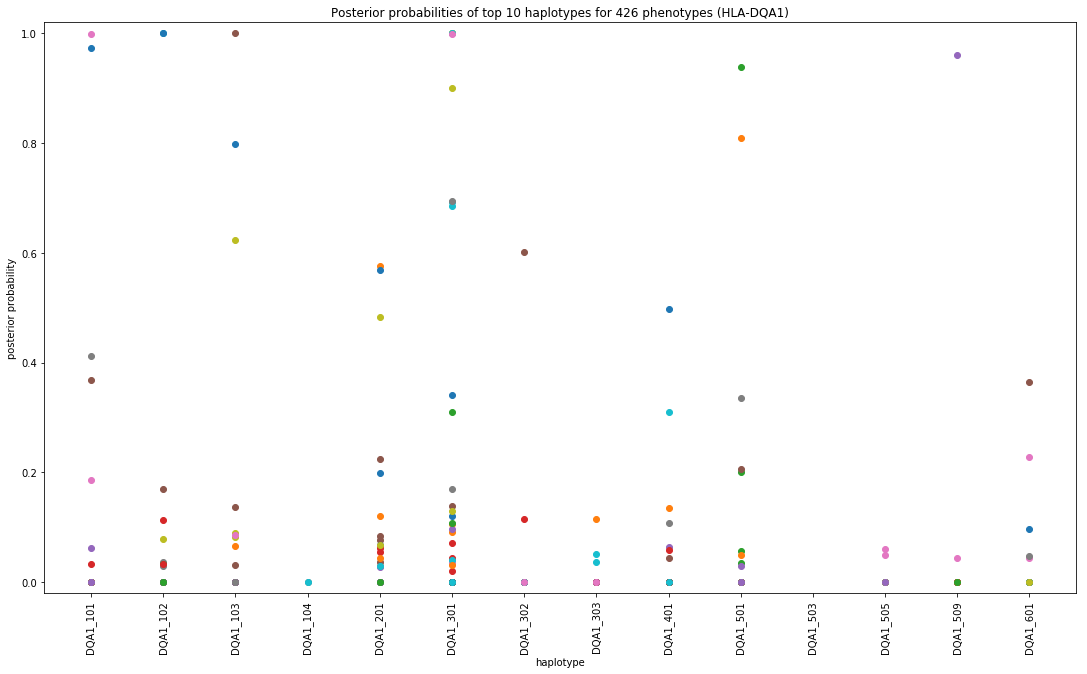

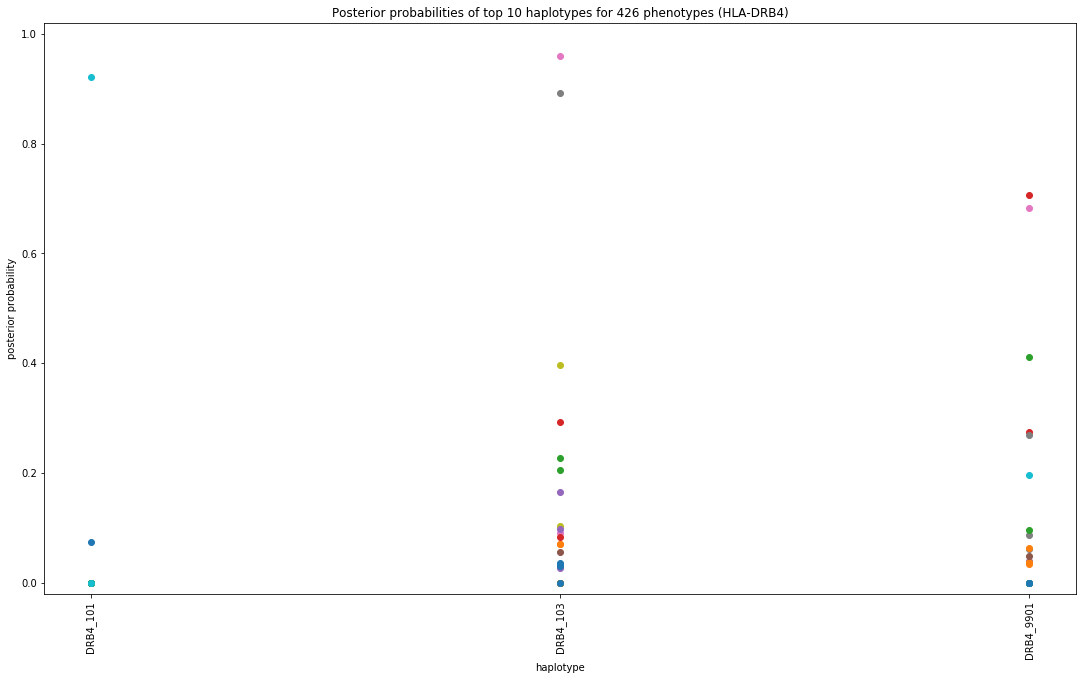

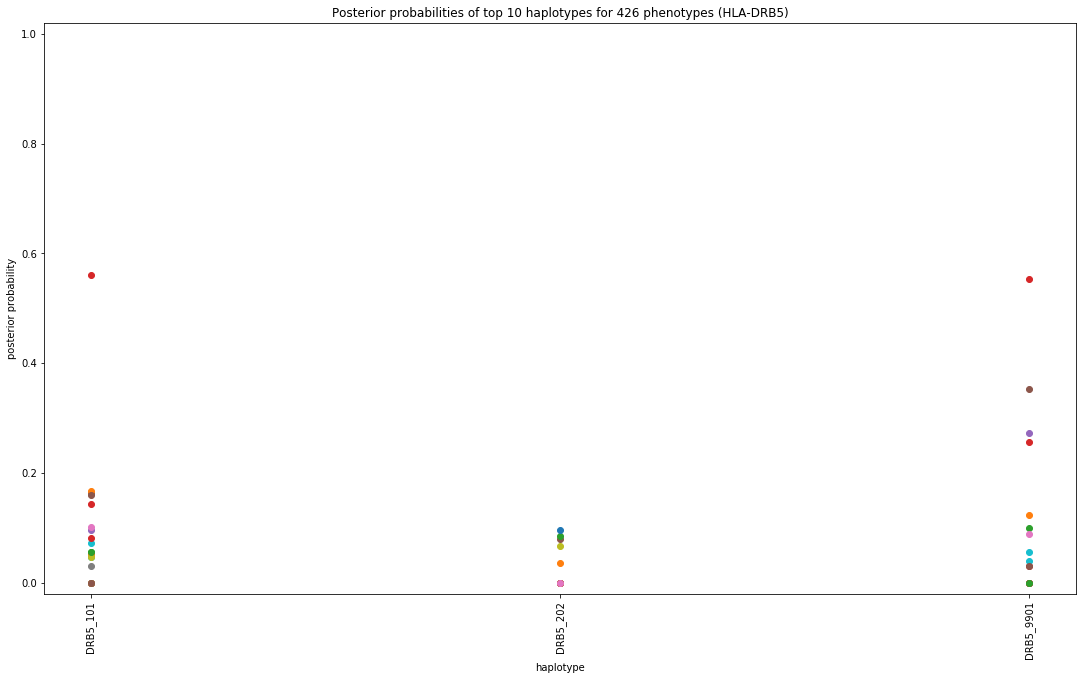

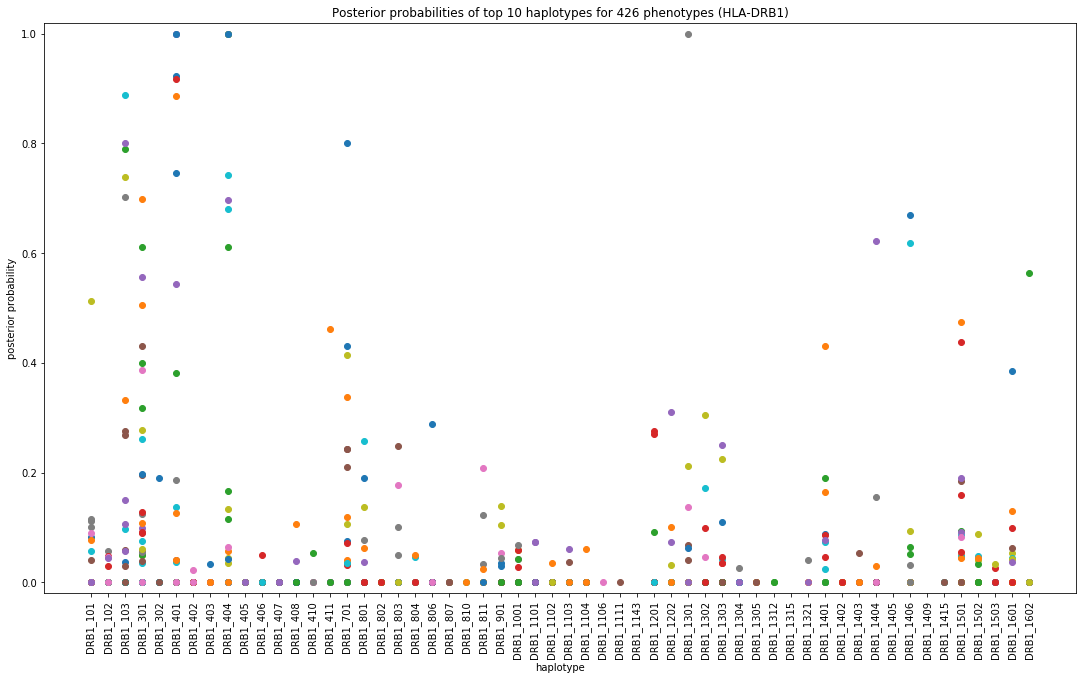

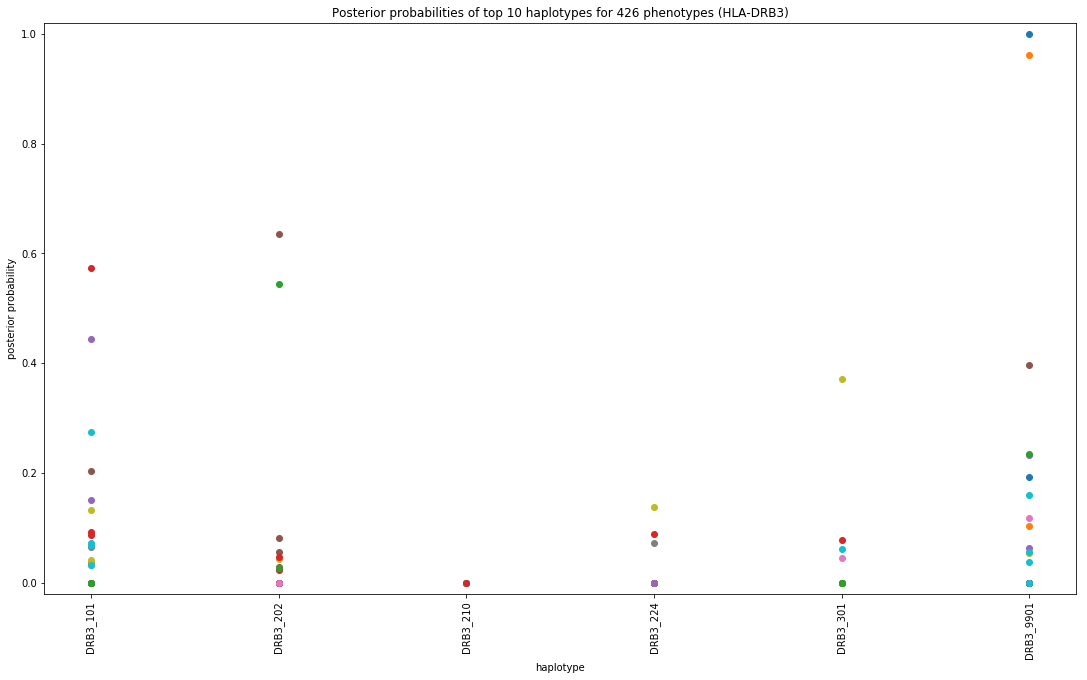

In [8]:


for gene in genes:
    filter_col = [col for col in df if col.startswith(gene)]
    df_gene = df[filter_col]
    df_gene.to_csv("~/oak/users/jolivier/repos/hla-assoc/phe_post_table_" + gene + ".csv")
    #hap_plot(df_gene)

In [ ]:
#list(df)
filter_col = [col for col in df if col.startswith('A_')]
#filter_col
df[filter_col]